# Fish Dataset

Consider yourself a data scientist, and you have been provided a dataset of Fish Attributes.

Fish Attributes consist of Weight, Length1 ,Length2, Length3 ,Height and Width for determining the Weight of the Fish.

Perform Weight prediction of a fish with respect to different features and visualize their relationship.

### Load the Important Libraries


In [85]:
# Loading Important Libraries
!pip install -q datascience                                         # Package that is required by pandas profiling
!pip install -q pandas-profiling

In [86]:
#------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
from ydata_profiling import ProfileReport                           # Import Ydata Profiling (To generate Univariate Analysis)
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.5f' % x)         # To suppress scientific notation over exponential values
##Importing the packages
from time import time
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
from scipy.stats import pearsonr                                    # Importing pearson test to check correlation
import statsmodels.api as sm                                        # Importing statsmodel api
#-------------------------------------------------------------------------------------------------------------------------------
import plotly.graph_objects as go                                   # Importing plotly graphical interface
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
import seaborn as sns                                               # Importin seaborm library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split                # To split the data in training and testing part
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor                      # Regression Model Decision Tree
from sklearn.ensemble import RandomForestRegressor                  # Regression Model Random Forest
from sklearn.svm import SVR                                         # Regression Model Support Vector Machine
from sklearn.linear_model import Ridge                              # Regression Model Lasso
from sklearn.linear_model import Lasso                              # Regression Model Lasso
from sklearn.neighbors import KNeighborsRegressor                   # Regression Model KNN
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import BayesianRidge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

### Load the data set

In [87]:
df  = pd.read_csv('/content/sample_data/Fish.csv')
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.00000,23.20000,25.40000,30.00000,11.52000,4.02000
1,Bream,290.00000,24.00000,26.30000,31.20000,12.48000,4.30560
2,Bream,340.00000,23.90000,26.50000,31.10000,12.37780,4.69610
3,Bream,363.00000,26.30000,29.00000,33.50000,12.73000,4.45550
4,Bream,430.00000,26.50000,29.00000,34.00000,12.44400,5.13400


As we can see that we have 7 Column and target variable is Weight and  

### 1. Check the Info of the data Set

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


Below are the Insight of the dataset
1. There is no null values are present into the data Set.
2. 6 Float and 1 Object are present

In [89]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.00000,159.00000,159.00000,159.00000,159.00000,159.00000
mean,398.32642,26.24717,28.41572,31.22704,8.97099,4.41749
std,357.97832,9.99644,10.71633,11.61025,4.28621,1.68580
min,0.00000,7.50000,8.40000,8.80000,1.72840,1.04760
25%,120.00000,19.05000,21.00000,23.15000,5.94480,3.38565
50%,273.00000,25.20000,27.30000,29.40000,7.78600,4.24850
75%,650.00000,32.70000,35.50000,39.65000,12.36590,5.58450
max,1650.00000,59.00000,63.40000,68.00000,18.95700,8.14200


Below are the Insight of the dataSet.
1. __Weight__ : Minimum value of weight is 0 that is looks suspected
2. __Weight__ : Maximum value of weight is 1650.00000 that is looks suspected

### 2. Check how many Spices present

In [90]:
df['Species'].value_counts()

,count
Species,
Perch,56
Bream,35
Roach,20
Pike,17
Smelt,14
Parkki,11
Whitefish,6


Insight :    
1. There are 7 types of Species are present and in that perch is mostly present into the dateset.

In [91]:
df.isnull().sum()

,0
Species,0
Weight,0
Length1,0
Length2,0
Length3,0
Height,0
Width,0


There is no null value present into the dataset.

In [92]:
df.duplicated().sum()

0

There is no duplicate value are present into the dataset.

In [93]:
df.shape

(159, 7)

### 3. EDA

1. check the Relation between Wight and Length
2. check the Relation between Wight and Width

<Axes: xlabel='Weight', ylabel='Length1'>

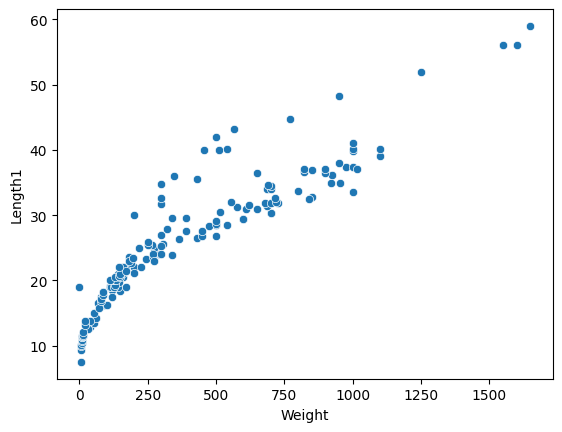

In [94]:
sns.scatterplot(x='Weight',y='Length1',data=df)

<Axes: xlabel='Weight', ylabel='Width'>

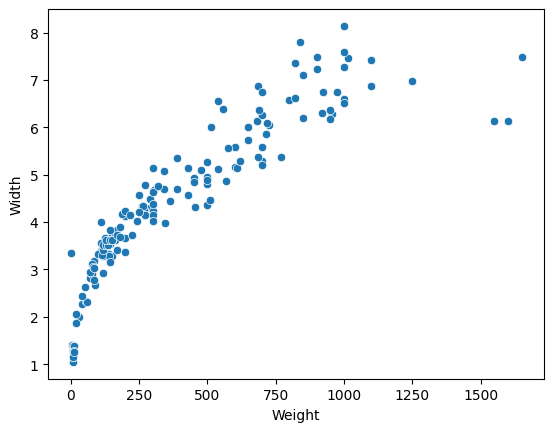

In [95]:
sns.scatterplot(x='Weight',y='Width',data=df)

As we can see that there is Positive Relation between weight and width and Weight and length

<Axes: >

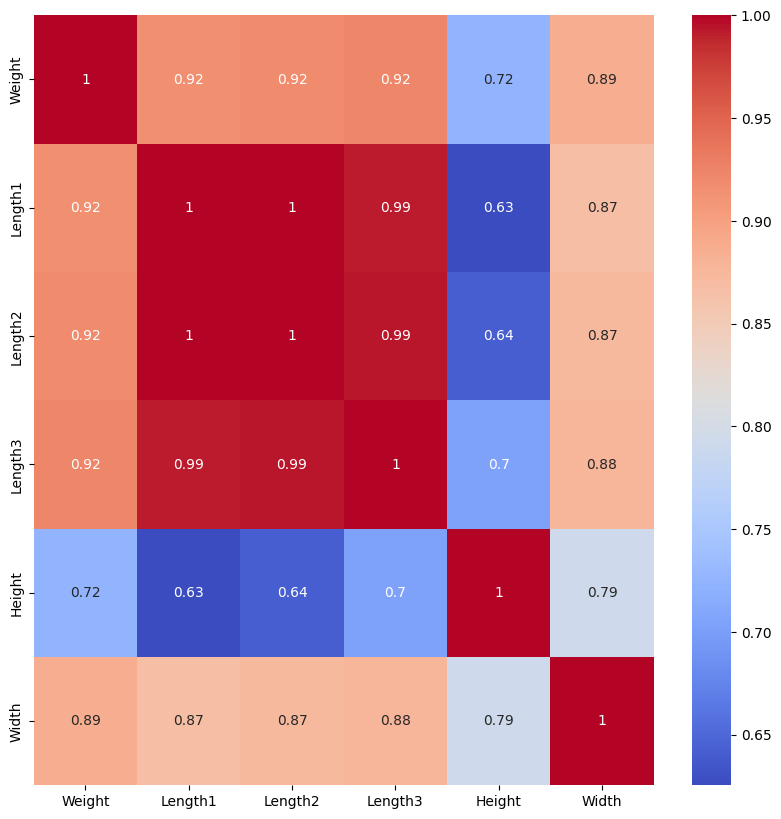

In [96]:
plt.figure(figsize=(10,10))
sns.heatmap(df.drop('Species', axis=1).corr(),annot=True,cmap='coolwarm')

### Data Preprocessing

#### Spliting the data into the Dependent and Independent variable


In [97]:
X = df.drop('Weight',axis=1) # Independent variable
y = df['Weight'] # Dependent Variable

#### Converting Categorical Data Into the Number using GetDummies is Part of One Hot Encoading

__One-Hot Encoding (GetDummies)__
What it does: Converts each unique category into a binary column (0 or 1) for each category.

Use case: Best suited when the categories do not have any ordinal relationship, which is typically the case with fish species.

In [98]:
#encoding the categorical variables into numerical
X = pd.get_dummies(data = X,
                      prefix = 'Species',
                      dummy_na = False,
                      columns = ['Species'],
                      sparse = False,
                      drop_first = False,
                      dtype = None)

X.head()

,Length1,Length2,Length3,Height,Width,Species_Bream,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,23.20000,25.40000,30.00000,11.52000,4.02000,True,False,False,False,False,False,False
1,24.00000,26.30000,31.20000,12.48000,4.30560,True,False,False,False,False,False,False
2,23.90000,26.50000,31.10000,12.37780,4.69610,True,False,False,False,False,False,False
3,26.30000,29.00000,33.50000,12.73000,4.45550,True,False,False,False,False,False,False
4,26.50000,29.00000,34.00000,12.44400,5.13400,True,False,False,False,False,False,False


In [99]:
X[['Species_Parkki','Species_Bream', 'Species_Perch', 'Species_Pike', 'Species_Roach', 'Species_Smelt', 'Species_Whitefish']] = X[['Species_Parkki', 'Species_Bream','Species_Perch', 'Species_Pike', 'Species_Roach', 'Species_Smelt', 'Species_Whitefish']].astype(int)


In [100]:
X.head()

,Length1,Length2,Length3,Height,Width,Species_Bream,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,23.20000,25.40000,30.00000,11.52000,4.02000,1,0,0,0,0,0,0
1,24.00000,26.30000,31.20000,12.48000,4.30560,1,0,0,0,0,0,0
2,23.90000,26.50000,31.10000,12.37780,4.69610,1,0,0,0,0,0,0
3,26.30000,29.00000,33.50000,12.73000,4.45550,1,0,0,0,0,0,0
4,26.50000,29.00000,34.00000,12.44400,5.13400,1,0,0,0,0,0,0


#### Standarization of the data. Using Standard Scaler

In [101]:
scaler  = StandardScaler()
X = scaler.fit_transform(X)

#### Splitting data Into the Train and Test so we can use it for Model and Evaulatution

In [102]:
# Splittting data into the train and test
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

### Model Creating and Model Evalution

In [103]:
def regression(model, model_name, X_train, y_train):
    """
    Trains a regression model, evaluates its performance on the test set,
    and visualizes the predictions compared to the actual values.

    Parameters:
    -----------
    model : object
        The regression model instance (e.g., LinearRegression, RandomForestRegressor) to be trained.

    model_name : str
        The name of the model (for use in the plot title).

    X_train : array-like or DataFrame
        Training feature data used to fit the model.

    y_train : array-like or Series
        Target values corresponding to the training feature data.

    Returns:
    --------
    r2_score : float
        The R-squared score of the model, representing the proportion of the variance explained by the model.

    mae : float
        Mean Absolute Error (MAE) between the predicted and actual values.

    rmse : float
        Root Mean Squared Error (RMSE) between the predicted and actual values.

    execution_time : float
        The time taken to train the model and make predictions (in seconds).

    Visual Output:
    --------------
    A scatter plot comparing the actual vs predicted values is displayed,
    with a line indicating perfect prediction (actual = predicted).
    The plot includes R-squared, MAE, and RMSE values in the title.

    Example:
    --------
    >>> from sklearn.linear_model import LinearRegression
    >>> model = LinearRegression()
    >>> r2, mae, rmse, time = regression(model, "Linear Regression", X_train, y_train)
    """
    start_time = time()  # Record start time
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2_score = model.score(X_test, y_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # Plot actual vs predicted values
    plt.figure()
    plt.plot(y_test, y_test)  # Line showing perfect predictions
    plt.scatter(y_test, y_pred, s=10, c="red")  # Predicted values
    plt.title(f"{model_name} : R2_score = {round(r2_score, 2)}, MAE = {round(mae, 2)}, RMSE = {round(rmse, 2)}")
    plt.xlabel("Actual values")
    plt.ylabel("Predicted values")
    plt.show()

    end_time = time()  # Record end time
    execution_time = end_time - start_time  # Calculate execution time

    return r2_score, mae, rmse, execution_time

In [104]:
results = []

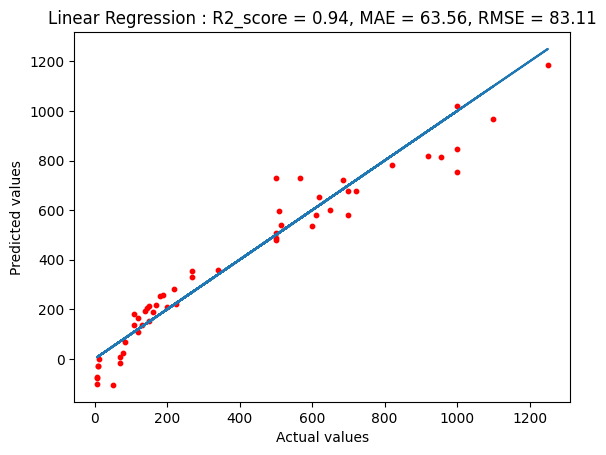

In [105]:
linearRegressin  = LinearRegression()
model_name = "Linear Regression"
r2_score, mae, rmse, execution_time = regression(linearRegressin, "Linear Regression", X_train, y_train)
results.append({
    'Model': model_name,
    'R2 Score': r2_score,
    'MAE': mae,
    'RMSE': rmse,
    'Execution Time (s)': execution_time
})

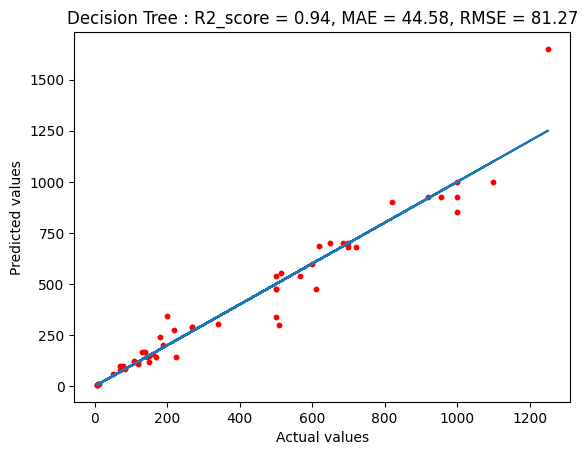

In [106]:
model = DecisionTreeRegressor()
model_name = "Decision Tree"
r2_score, mae, rmse, execution_time = regression(model, model_name, X_train, y_train)
results.append({
    'Model': model_name,
    'R2 Score': r2_score,
    'MAE': mae,
    'RMSE': rmse,
    'Execution Time (s)': execution_time
})


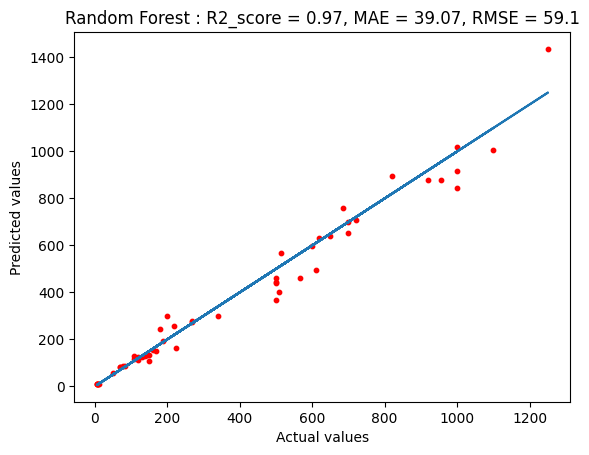

In [107]:
randomForest  = RandomForestRegressor()
model_name = "Random Forest"
r2_score, mae, rmse, execution_time = regression(randomForest, model_name, X_train, y_train)
results.append({
    'Model': model_name,
    'R2 Score': r2_score,
    'MAE': mae,
    'RMSE': rmse,
    'Execution Time (s)': execution_time
})

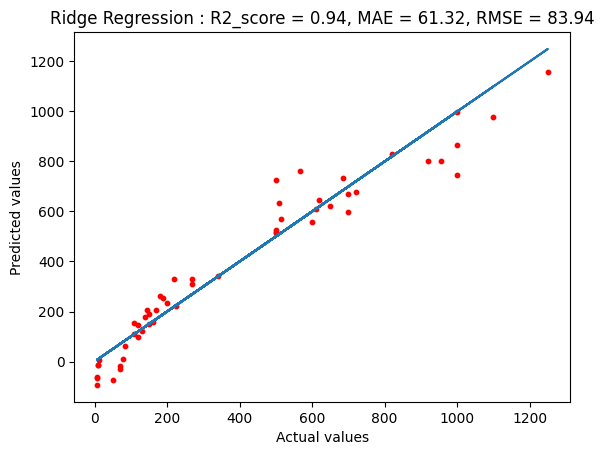

In [109]:
model = Ridge(alpha=1.0)
model_name = "Ridge Regression"
r2_score, mae, rmse, execution_time = regression(model, model_name, X_train, y_train)
results.append({
    'Model': model_name,
    'R2 Score': r2_score,
    'MAE': mae,
    'RMSE': rmse,
    'Execution Time (s)': execution_time
})

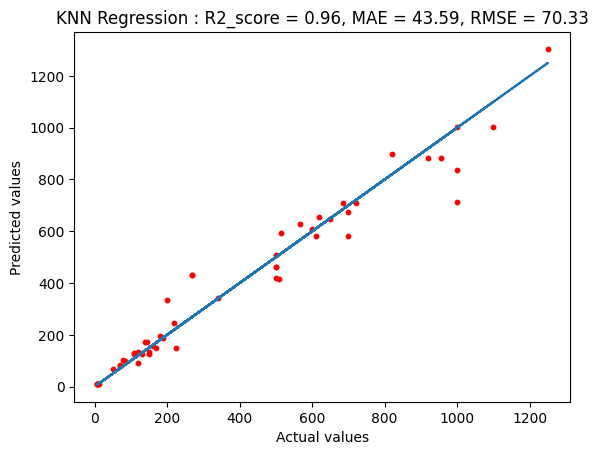

In [110]:
model = KNeighborsRegressor(n_neighbors=5)
model_name = "KNN Regression"
r2_score, mae, rmse, execution_time = regression(model, model_name, X_train, y_train)
results.append({
    'Model': model_name,
    'R2 Score': r2_score,
    'MAE': mae,
    'RMSE': rmse,
    'Execution Time (s)': execution_time
})

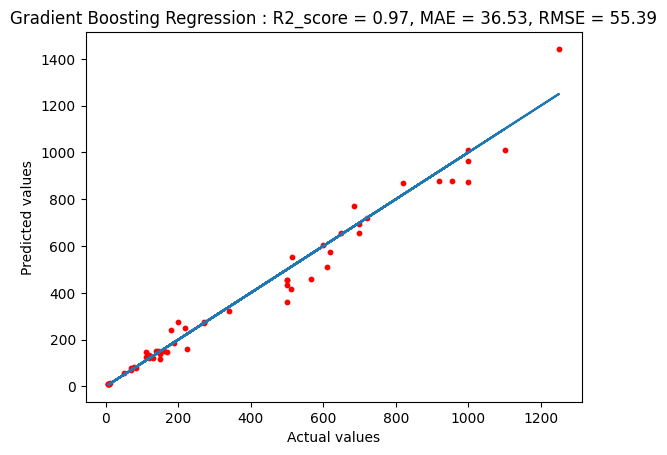

In [111]:
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=0)
model_name = "Gradient Boosting Regression"
r2_score, mae, rmse, execution_time = regression(model, model_name, X_train, y_train)
results.append({
    'Model': model_name,
    'R2 Score': r2_score,
    'MAE': mae,
    'RMSE': rmse,
    'Execution Time (s)': execution_time
})

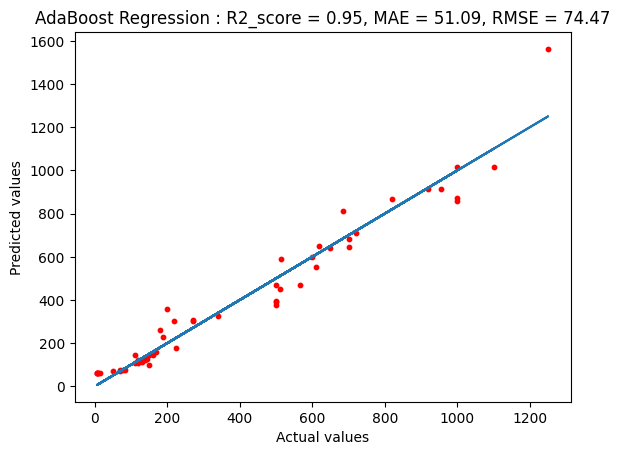

In [112]:
model = AdaBoostRegressor(n_estimators=100, random_state=0)
model_name = "AdaBoost Regression"
r2_score, mae, rmse, execution_time = regression(model, model_name, X_train, y_train)
results.append({
    'Model': model_name,
    'R2 Score': r2_score,
    'MAE': mae,
    'RMSE': rmse,
    'Execution Time (s)': execution_time
})

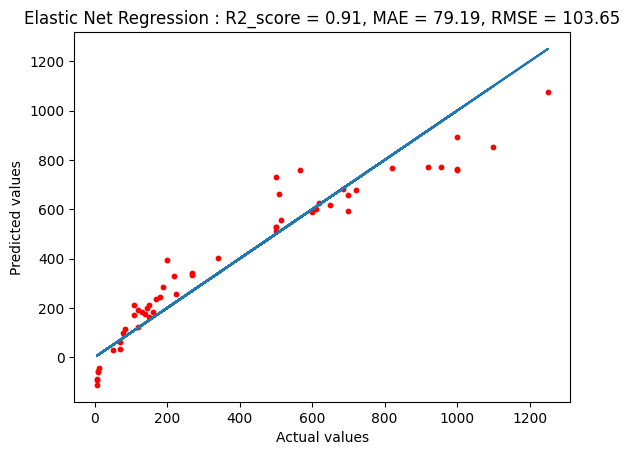

In [113]:
model = ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=0)
model_name = "Elastic Net Regression"
r2_score, mae, rmse, execution_time = regression(model, model_name, X_train, y_train)
results.append({
    'Model': model_name,
    'R2 Score': r2_score,
    'MAE': mae,
    'RMSE': rmse,
    'Execution Time (s)': execution_time
})

In [114]:
results_df = pd.DataFrame(results)

# Print the DataFrame
results_df.head(10)

,Model,R2 Score,MAE,RMSE,Execution Time (s)
0,Linear Regression,0.94052,63.56048,83.11174,0.46938
1,Decision Tree,0.94312,44.58302,81.27336,0.49560
2,Random Forest,0.96993,39.06961,59.09777,0.39877
3,SVM,-0.01454,275.07416,343.24913,0.24292
4,Ridge Regression,0.93932,61.31563,83.94212,0.35999
5,KNN Regression,0.95740,43.58981,70.33291,0.47224
6,Gradient Boosting Regression,0.97358,36.53217,55.39358,0.57189
7,AdaBoost Regression,0.95225,51.08694,74.46811,1.32531
8,Elastic Net Regression,0.90750,79.18874,103.64506,0.40142


In [115]:
sorted_results_df = results_df.sort_values(by='R2 Score', ascending=False)

In [116]:
sorted_results_df.head(10)

,Model,R2 Score,MAE,RMSE,Execution Time (s)
6,Gradient Boosting Regression,0.97358,36.53217,55.39358,0.57189
2,Random Forest,0.96993,39.06961,59.09777,0.39877
5,KNN Regression,0.95740,43.58981,70.33291,0.47224
7,AdaBoost Regression,0.95225,51.08694,74.46811,1.32531
1,Decision Tree,0.94312,44.58302,81.27336,0.49560
0,Linear Regression,0.94052,63.56048,83.11174,0.46938
4,Ridge Regression,0.93932,61.31563,83.94212,0.35999
8,Elastic Net Regression,0.90750,79.18874,103.64506,0.40142
3,SVM,-0.01454,275.07416,343.24913,0.24292
